In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split as tt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from dateutil import parser
import isodate
import cufflinks as cf
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('YT - Affair dataset with description.csv')
# df

In [3]:
df = df[df['age']>18]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        961 non-null    float64
 1   affair_status  961 non-null    object 
 2   gender         961 non-null    object 
 3   age            961 non-null    int64  
 4   yearsmarried   961 non-null    float64
 5   children       961 non-null    object 
 6   religiousness  961 non-null    float64
 7   education      961 non-null    float64
 8   occupation     961 non-null    float64
 9   rating         961 non-null    float64
 10  region         961 non-null    object 
 11  frequentflyer  961 non-null    object 
 12  income_level   961 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 105.1+ KB


In [5]:
s = df.gender.value_counts()
print(s)

pv = df.gender.value_counts(normalize=True) * 100
pv

female    517
male      444
Name: gender, dtype: int64


female    53.798127
male      46.201873
Name: gender, dtype: float64

In [6]:
a = df.age.value_counts()[:10]
h = df.children.value_counts()
print(h)
df.children.value_counts(normalize=True) * 100
# a

yes    689
no     272
Name: children, dtype: int64


yes    71.69615
no     28.30385
Name: children, dtype: float64

In [7]:
most_common_value = df[df.gender=='female'].age.mode()[0]
count = df[df.gender=='female'].age.value_counts()[most_common_value]
print("Female Common Age:",most_common_value," Number of occurences:",count)
most_common_value = df[df.gender=='male'].age.mode()[0]
count = df[df.gender=='male'].age.value_counts()[most_common_value]
print("Male Common Age:",most_common_value," Number of occurences:",count)

Female Common Age: 27  Number of occurences: 91
Male Common Age: 27  Number of occurences: 74


In [8]:
u = df[df.gender=='female'].age.value_counts()
# u

0.5361698255700291


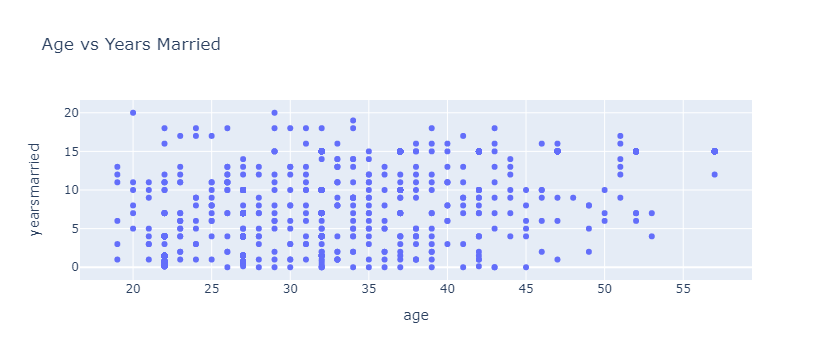

In [9]:
correlation = df['age'].corr(df['yearsmarried'])
print(correlation)

fig = px.scatter(df, x="age", y="yearsmarried", title="Age vs Years Married") 
fig.show()

In [10]:
# Bar Charts
f = df.groupby('gender')['age'].value_counts()
f

gender  age
female  27     91
        22     86
        32     72
        37     36
        42     33
               ..
male    51      3
        44      2
        49      2
        19      1
        50      1
Name: age, Length: 70, dtype: int64

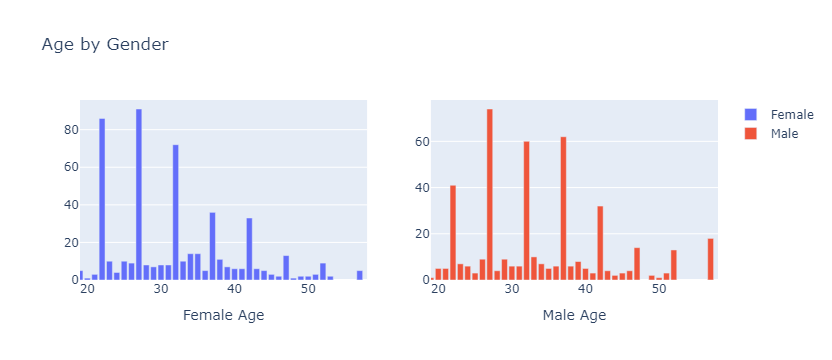

In [11]:
min_age = min(df.age)
max_age = max(df.age)

fig = make_subplots(rows=1, cols=2)

female_data = df[df['gender'] == 'female']
f_d = female_data['age'].value_counts()
fig.add_trace(go.Bar(x=list(f_d.index), y=list(f_d.values),name='Female'), row=1, col=1)
fig.update_xaxes(title_text="Female Age", row=1, col=1,range=[min_age, max_age+1])

male_data = df[df['gender'] == 'male']
m_d = male_data['age'].value_counts()
fig.add_trace(go.Bar(x=list(m_d.index), y=list(m_d.values),name='Male'), row=1, col=2)
fig.update_xaxes(title_text="Male Age", row=1, col=2,range=[min_age, max_age+1])

fig.update_layout(title="Age by Gender")

fig.show()

In [12]:
df['affair_status'].value_counts()

No     719
Yes    242
Name: affair_status, dtype: int64

In [13]:
df.groupby('gender')['affair_status'].value_counts(normalize=True) * 100

gender  affair_status
female  No               75.822050
        Yes              24.177950
male    No               73.648649
        Yes              26.351351
Name: affair_status, dtype: float64

In [14]:
gr = df.groupby(['gender','affair_status'],axis=0)['age'].value_counts()
gr

gender  affair_status  age
female  No             22     76
                       27     68
                       32     50
                       37     30
                       42     19
                              ..
male    Yes            34      1
                       35      1
                       41      1
                       44      1
                       46      1
Name: age, Length: 126, dtype: int64

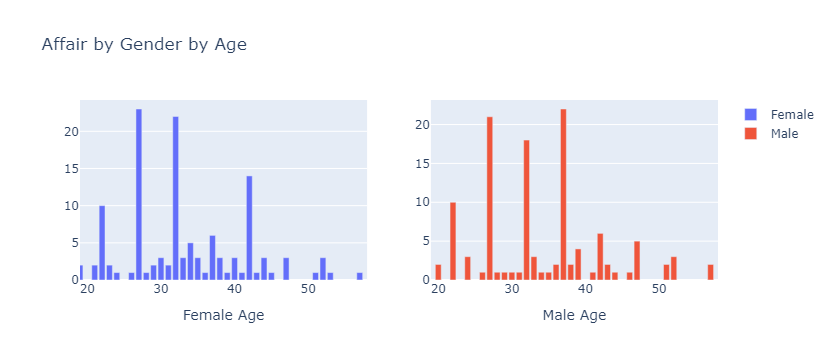

In [15]:
grf = gr['female']['Yes']
grm = gr['male']['Yes']

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=list(grf.index), y=list(grf.values),name='Female'), row=1, col=1)
fig.update_xaxes(title_text="Female Age", row=1, col=1,range=[min_age, max_age+1])

fig.add_trace(go.Bar(x=list(grm.index), y=list(grm.values),name='Male'), row=1, col=2)
fig.update_xaxes(title_text="Male Age", row=1, col=2,range=[min_age, max_age+1])

fig.update_layout(title="Affair by Gender by Age")

fig.show()

In [16]:
gy = df.groupby(['gender','affair_status'],axis=0)['yearsmarried'].value_counts()

In [17]:
# gy['female']['Yes']

In [18]:
gyf = gy['female']['Yes']
gym = gy['male']['Yes']

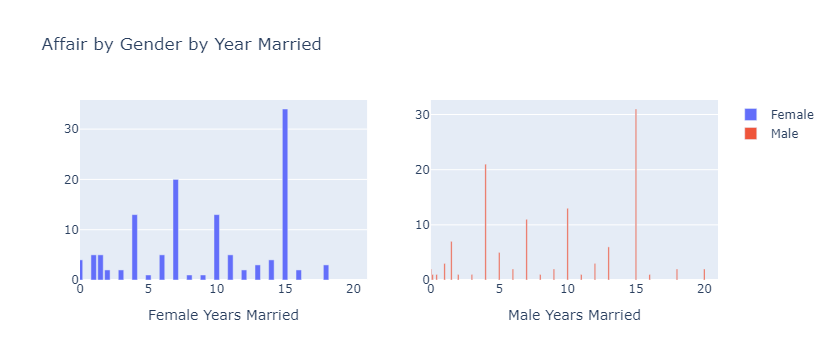

In [19]:
ym = max(df.yearsmarried)

fig = make_subplots(rows=1, cols=2)

# plot data for female gender
fig.add_trace(go.Bar(x=list(gyf.index), y=list(gyf.values),name='Female'), row=1, col=1)
fig.update_xaxes(title_text="Female Years Married", row=1, col=1,range=[0, ym+1])

# plot data for male gender
fig.add_trace(go.Bar(x=list(gym.index), y=list(gym.values),name='Male'), row=1, col=2)
fig.update_xaxes(title_text="Male Years Married", row=1, col=2,range=[0, ym+1])
fig.update_layout(title="Affair by Gender by Year Married")

# show plot
fig.show()

In [20]:
# df.occupation.unique()
df.religiousness.value_counts()
# df.education.unique()
# df.rating.unique()

2.0    271
4.0    256
3.0    231
1.0    103
5.0     76
0.0     20
6.0      3
7.0      1
Name: religiousness, dtype: int64

In [21]:
gp = df.groupby(['gender'],axis=0)['religiousness'].value_counts()

In [22]:
gp = gp.sort_index()
gp

gender  religiousness
female  0.0                8
        1.0               52
        2.0              157
        3.0              127
        4.0              131
        5.0               38
        6.0                3
        7.0                1
male    0.0               12
        1.0               51
        2.0              114
        3.0              104
        4.0              125
        5.0               38
Name: religiousness, dtype: int64

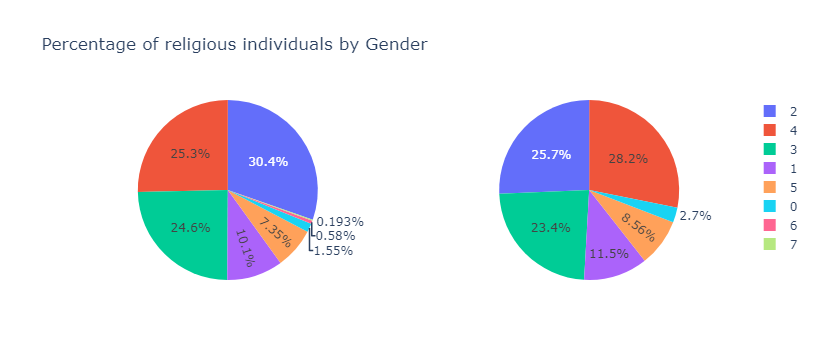

In [23]:
gpf = gp['female']
gpm = gp['male']

# Create the pie chart trace
trace_pie1 = go.Pie(labels=gpf.index, values=gpf.values,name='Female')
trace_pie2 = go.Pie(labels=gpm.index, values=gpm.values,name='Male')
# Create the subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]])

# Add the traces to the subplots
fig.add_trace(trace_pie1, row=1, col=1)
fig.add_trace(trace_pie2, row=1, col=2)
fig.update_xaxes(title_text='Female', row=1, col=1)
fig.update_xaxes(title_text='Male', row=1, col=2)

# Set the layout of the chart
fig.update_layout(title='Percentage of religious individuals by Gender',legend=dict(y=1.02,
                        xanchor='right',x=1.1 ))

fig.show()

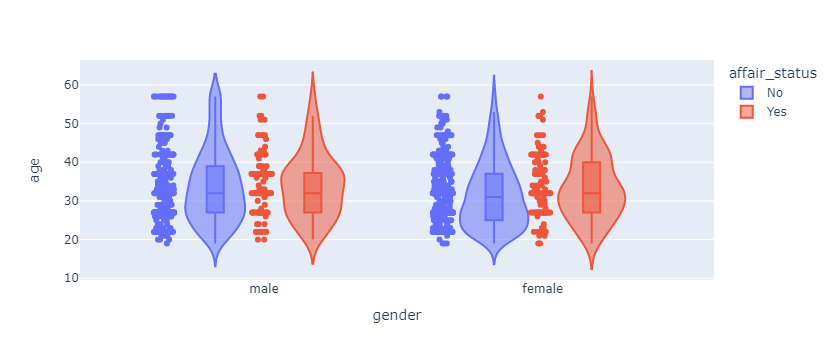

In [24]:
# Multiple plots
l = px.violin(df, y="age", x="gender", color="affair_status", box=True, points="all",
          hover_data=df.columns)

l

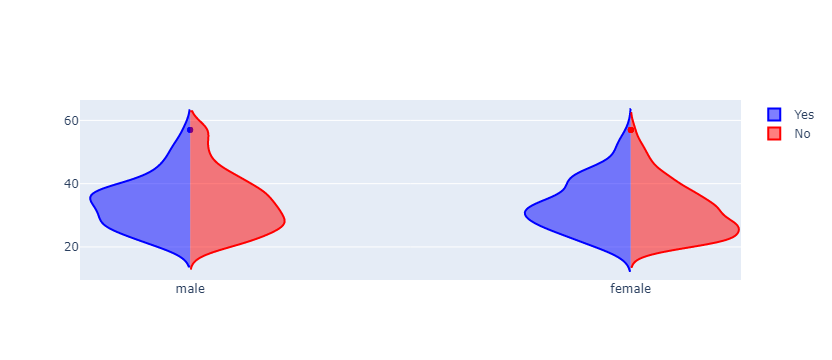

In [25]:
# Morph left and right sides based on if the customer smokes
fig = go.Figure()
fig.add_trace(go.Violin(x=df['gender'][df['affair_status'] == 'Yes'],
                        y=df['age'][df['affair_status'] == 'Yes'],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='negative',line_color='blue'))
fig.add_trace(go.Violin(x=df['gender'][ df['affair_status'] == 'No' ],
                        y=df['age'][ df['affair_status'] == 'No' ],
                        legendgroup='Yes', scalegroup='Yes', name='No',
                        side='positive',line_color='red'))


In [26]:
contingency_table = pd.crosstab(df['gender'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print(contingency_table)

male_affairs = contingency_table.loc['male', 'Yes']
male_total = contingency_table.loc['male', :].sum()
male_proportion = male_affairs / male_total

female_affairs = contingency_table.loc['female', 'Yes']
female_total = contingency_table.loc['female', :].sum()
female_proportion = female_affairs / female_total

if p_value < 0.05:
    if male_proportion > female_proportion:
        print('Males are more probable of having an affair.')
    else:
        print('Females are more probable of having an affair.')
else:
    print('There is no significant relationship between gender and affair.')

affair_status   No  Yes
gender                 
female         392  125
male           327  117
Chi-square statistic: 0.4890685838997297
P-value: 0.48434308224434186
affair_status   No  Yes
gender                 
female         392  125
male           327  117
There is no significant relationship between gender and affair.


In [27]:
contingency_table = pd.crosstab(df['children'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

with_children_affairs = contingency_table.loc['yes', 'Yes']
with_children_total = contingency_table.loc['yes', :].sum()
with_children_proportion = with_children_affairs / with_children_total

without_children_affairs = contingency_table.loc['no', 'Yes']
without_children_total = contingency_table.loc['no', :].sum()
without_children_proportion = without_children_affairs / without_children_total

if p_value < 0.05:
    if with_children_proportion > without_children_proportion:
        print('Individuals with children are more probable of having an affair.')
    else:
        print('Individuals without children are more probable of having an affair.')
else:
    print('There is no significant relationship between children and affair.')

affair_status   No  Yes
children               
no             218   54
yes            501  188
Chi-square statistic: 5.330933731699149
P-value: 0.0209501584359022
Individuals with children are more probable of having an affair.


In [28]:
contingency_table = pd.crosstab(df['region'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

rural_affairs = contingency_table.loc['rural', 'Yes']
rural_total = contingency_table.loc['rural', :].sum()
rural_proportion = rural_affairs / rural_total

urban_affairs = contingency_table.loc['urban', 'Yes']
urban_total = contingency_table.loc['urban', :].sum()
urban_proportion = urban_affairs / urban_total

if p_value < 0.05:
    if rural_proportion > urban_proportion:
        print('Individuals living in rural regions are more probable of having an affair.')
    else:
        print('Individuals living in urban regions are more probable of having an affair.')
else:
    print('There is no significant relationship between region and affair.')

affair_status   No  Yes
region                 
rural          359  133
urban          360  109
Chi-square statistic: 1.6364195047955445
P-value: 0.20081743502011973
There is no significant relationship between region and affair.


In [29]:
contingency_table = pd.crosstab(df['frequentflyer'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

frequentflyer_affairs = contingency_table.loc['yes', 'Yes']
frequentflyer_total = contingency_table.loc['yes', :].sum()
frequentflyer_proportion = frequentflyer_affairs / frequentflyer_total

non_frequentflyer_affairs = contingency_table.loc['no', 'Yes']
non_frequentflyer_total = contingency_table.loc['no', :].sum()
non_frequentflyer_proportion = non_frequentflyer_affairs / non_frequentflyer_total

if p_value < 0.05:
    if frequentflyer_proportion > non_frequentflyer_proportion:
        print('Individuals who are frequently travelling are more probable of having an affair.')
    else:
        print('Individuals who are not frequently travelling are more probable of having an affair.')
else:
    print('There is no significant relationship between frequent flyers and affair.')

affair_status   No  Yes
frequentflyer          
no             356  117
yes            363  125
Chi-square statistic: 0.057374721168242535
P-value: 0.8106944744837461
There is no significant relationship between frequent flyers and affair.


In [30]:
contingency_table = pd.crosstab(df['income_level'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

if p_value < 0.05:
    print('There is a significant relationship between income level and affair.')
else:
    print('There is no significant relationship between income level and affair.')

affair_status      No  Yes
income_level              
100000 - 150000    98   25
150000 - 200,000   92   42
200000 or more     97   34
25000 - 50000     107   42
50000 - 75000     111   34
75,000 - 100000   110   35
Under 25000       104   30
Chi-square statistic: 5.866306544821368
P-value: 0.43833209512358473
There is no significant relationship between income level and affair.


In [31]:
contingency_table = pd.crosstab(df['occupation'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

if p_value < 0.05:
    print('There is a significant relationship between occupation and affair.')
else:
    print('There is no significant relationship between occupation and affair.')

affair_status   No  Yes
occupation             
0.0              7    5
1.0            108   27
2.0             50   19
3.0             91   38
4.0            103   42
5.0            199   58
6.0            139   47
7.0             20    6
8.0              2    0
Chi-square statistic: 7.878148928589999
P-value: 0.4454626513179689
There is no significant relationship between occupation and affair.


In [32]:
contingency_table = pd.crosstab(df['education'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

if p_value < 0.05:
    print('There is a significant relationship between education and affair.')
else:
    print('There is no significant relationship between education and affair.')

affair_status   No  Yes
education              
9.0              6    2
10.0             3    3
11.0             9    3
12.0            44   15
13.0            19   10
14.0           153   53
15.0            44   15
16.0           144   37
17.0            94   37
18.0           113   41
19.0            15    4
20.0            73   21
21.0             2    1
Chi-square statistic: 6.990497496575961
P-value: 0.8582408795035875
There is no significant relationship between education and affair.


In [33]:
contingency_table = pd.crosstab(df['religiousness'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

if p_value < 0.05:
    print('There is a significant relationship between religiousness and affair.')
else:
    print('There is no significant relationship between religiousness and affair.')

affair_status   No  Yes
religiousness          
0.0             16    4
1.0             59   44
2.0            212   59
3.0            165   66
4.0            203   53
5.0             62   14
6.0              2    1
7.0              0    1
Chi-square statistic: 27.825519155421574
P-value: 0.00023648778326639224
There is a significant relationship between religiousness and affair.


In [34]:
df.religiousness.unique()

array([3., 4., 1., 5., 2., 0., 6., 7.])

In [35]:
l = []
f = list(df.religiousness)
for i in f:
    if i>3:
        l.append('yes')
    else:
        l.append('no')
    
df.religiousness = l

In [36]:
contingency_table = pd.crosstab(df['religiousness'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

religious_affairs = contingency_table.loc['yes', 'Yes']
religious_total = contingency_table.loc['yes', :].sum()
religious_proportion = religious_affairs / religious_total

non_religious_affairs = contingency_table.loc['no', 'Yes']
non_religious_total = contingency_table.loc['no', :].sum()
non_religious_proportion = non_religious_affairs / non_religious_total

if p_value < 0.05:
    if religious_proportion > non_religious_proportion:
        print('Individuals who are religious are more probable of having an affair.')
    else:
        print('Individuals who are non-religious are more probable of having an affair.')
else:
    print('There is no significant relationship between frequent religiousness and affair.')

affair_status   No  Yes
religiousness          
no             452  173
yes            267   69
Chi-square statistic: 5.546801277033014
P-value: 0.01851449211861301
Individuals who are non-religious are more probable of having an affair.


In [37]:
contingency_table = pd.crosstab(df['yearsmarried'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

if p_value < 0.05:
    print('There is a significant relationship between yearsmarried and affair.')
else:
    print('There is no significant relationship between yearsmarried and affair.')

affair_status   No  Yes
yearsmarried           
0.000           10    6
0.125           10    1
0.417            9    1
0.750           27    0
1.000           17    8
1.500           75   12
2.000           16    3
3.000           15    3
4.000           94   34
5.000           18    6
6.000           15    7
7.000           76   31
8.000           22    2
9.000           23    3
10.000          70   26
11.000          25    6
12.000          14    5
13.000          11    9
14.000           5    4
15.000         149   65
16.000           7    3
17.000           5    0
18.000           5    5
19.000           1    0
20.000           0    2
Chi-square statistic: 50.0577779861151
P-value: 0.0013922020842335122
There is a significant relationship between yearsmarried and affair.


In [38]:
l = []
f = list(df.yearsmarried)
for i in f:
    if i<10:
        l.append('<10')
    else:
        l.append('>=10')
    
df.yearsmarried = l

In [39]:
contingency_table = pd.crosstab(df['yearsmarried'], df['affair_status'])
print(contingency_table)

# perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

less_than_10_affairs = contingency_table.loc['<10', 'Yes']
less_than_10_total = contingency_table.loc['<10', :].sum()
less_than_10_proportion = less_than_10_affairs / less_than_10_total

ten_or_more_affairs = contingency_table.loc['>=10', 'Yes']
ten_or_more_total = contingency_table.loc['>=10', :].sum()
ten_or_more_proportion = ten_or_more_affairs / ten_or_more_total

if p_value < 0.05:
    if less_than_10_proportion > ten_or_more_proportion:
        print('Individuals who are married for less than 10 years are more probable of having an affair.')
    else:
        print('Individuals who are married for 10 years or more are more probable of having an affair.')
else:
    print('There is no significant relationship between frequent religiousness and affair.')

affair_status   No  Yes
yearsmarried           
<10            427  117
>=10           292  125
Chi-square statistic: 8.541672544138034
P-value: 0.003471065389038189
Individuals who are married for 10 years or more are more probable of having an affair.


In [40]:
# Predictive Analysis

In [41]:
cols = list(df.columns)

In [42]:
cols

['affairs',
 'affair_status',
 'gender',
 'age',
 'yearsmarried',
 'children',
 'religiousness',
 'education',
 'occupation',
 'rating',
 'region',
 'frequentflyer',
 'income_level']

In [43]:
df.head()

,affairs,affair_status,gender,age,yearsmarried,children,religiousness,education,occupation,rating,region,frequentflyer,income_level
0,0.0,No,male,37,>=10,no,no,18.0,7.0,4.0,urban,yes,"150000 - 200,000"
1,0.0,No,female,27,<10,no,yes,14.0,6.0,4.0,rural,no,"150000 - 200,000"
2,0.0,No,female,32,>=10,yes,no,12.0,1.0,4.0,rural,no,Under 25000
3,0.0,No,male,57,>=10,yes,yes,18.0,6.0,5.0,rural,yes,"75,000 - 100000"
4,0.0,No,male,22,<10,no,no,17.0,6.0,3.0,rural,yes,"75,000 - 100000"


In [44]:
c = list(df.columns)
y = []
g = []
for i in range(len(c)):
    if df[c[i]].dtype == "object":
        g.append(c[i])
        l = df[c[i]].unique()
        y.append(l)

# Label Mapping
ma = {}
for i in range(len(y)):
    o = {}
    for j in range(len(y[i])):
        o[y[i][j]] = j
        df.replace({g[i]:{y[i][j]:j}},inplace=True)
    ma[g[i]] = o

ma

{'affair_status': {'No': 0, 'Yes': 1},
 'gender': {'male': 0, 'female': 1},
 'yearsmarried': {'>=10': 0, '<10': 1},
 'children': {'no': 0, 'yes': 1},
 'religiousness': {'no': 0, 'yes': 1},
 'region': {'urban': 0, 'rural': 1},
 'frequentflyer': {'yes': 0, 'no': 1},
 'income_level': {'150000 - 200,000': 0,
  'Under 25000': 1,
  '75,000 - 100000': 2,
  '50000 - 75000': 3,
  '200000 or more': 4,
  '100000 - 150000': 5,
  '25000 - 50000': 6}}

In [45]:
df.head()

,affairs,affair_status,gender,age,yearsmarried,children,religiousness,education,occupation,rating,region,frequentflyer,income_level
0,0.0,0,0,37,0,0,0,18.0,7.0,4.0,0,0,0
1,0.0,0,1,27,1,0,1,14.0,6.0,4.0,1,1,0
2,0.0,0,1,32,0,1,0,12.0,1.0,4.0,1,1,1
3,0.0,0,0,57,0,1,1,18.0,6.0,5.0,1,0,2
4,0.0,0,0,22,1,0,0,17.0,6.0,3.0,1,0,2


In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

d_cols = ['affairs','affair_status','rating']

x = df.drop(d_cols, axis=1)
y = df['affair_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

sv = SVC()
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7875647668393783
Accuracy: 0.7875647668393783


In [47]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(random_state=0, max_depth=3), GaussianNB(),MLPClassifier(random_state=1, max_iter=300)]

def compare_models_train_test():
    for model in models:
        # training the model
        model.fit(x_train, y_train)
        # evaluating the model
        y_test_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        print('Accuracy score of the ', model, ' = ', accuracy)
        print()


compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.7875647668393783

Accuracy score of the  SVC(kernel='linear')  =  0.7875647668393783

Accuracy score of the  KNeighborsClassifier()  =  0.7098445595854922

Accuracy score of the  RandomForestClassifier()  =  0.7564766839378239

Accuracy score of the  DecisionTreeClassifier(max_depth=3, random_state=0)  =  0.7979274611398963

Accuracy score of the  GaussianNB()  =  0.7875647668393783

Accuracy score of the  MLPClassifier(max_iter=300, random_state=1)  =  0.7875647668393783



In [48]:
def compare_models_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, x, y,cv=5)
        mean_accuracy = sum(cv_score) / len(cv_score)
        mean_accuracy = mean_accuracy * 100
        mean_accuracy = round(mean_accuracy, 2)

        print('Cross Validation accuracies for ', model, '=  ', cv_score)
        print('Accuracy % of the ', model, mean_accuracy)
        print()

compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.74611399 0.75       0.75       0.75       0.74479167]
Accuracy % of the  LogisticRegression(max_iter=1000) 74.82

Cross Validation accuracies for  SVC(kernel='linear') =   [0.74611399 0.75       0.75       0.75       0.74479167]
Accuracy % of the  SVC(kernel='linear') 74.82

Cross Validation accuracies for  KNeighborsClassifier() =   [0.70466321 0.74479167 0.703125   0.6875     0.71875   ]
Accuracy % of the  KNeighborsClassifier() 71.18

Cross Validation accuracies for  RandomForestClassifier() =   [0.75647668 0.74479167 0.75       0.69270833 0.72916667]
Accuracy % of the  RandomForestClassifier() 73.46

Cross Validation accuracies for  DecisionTreeClassifier(max_depth=3, random_state=0) =   [0.74611399 0.734375   0.75       0.75520833 0.74479167]
Accuracy % of the  DecisionTreeClassifier(max_depth=3, random_state=0) 74.61

Cross Validation accuracies for  GaussianNB() =   [0.74093264 0.75       0.75520833 0.7083

In [51]:
# Mappings
# {'affair_status': {'No': 0, 'Yes': 1},
#  'gender': {'male': 0, 'female': 1},
#  'yearsmarried': {'>=10': 0, '<10': 1},
#  'children': {'no': 0, 'yes': 1},
#  'religiousness': {'no': 0, 'yes': 1},
#  'region': {'urban': 0, 'rural': 1},
#  'frequentflyer': {'yes': 0, 'no': 1},
#  'income_level': {'150000 - 200,000': 0,
#   'Under 25000': 1,
#   '75,000 - 100000': 2,
#   '50000 - 75000': 3,
#   '200000 or more': 4,
#   '100000 - 150000': 5,
#   '25000 - 50000': 6}}


# ip = [gender  age  yearsmarried  children  religiousness  education  occupation  region  frequentflyer  
#        income_level ]
ip = [ma['gender']['male'],27,ma['yearsmarried']['>=10'],ma['children']['yes'],ma['religiousness']['yes'],
      12,5,ma['region']['urban'],ma['frequentflyer']['no'],ma['income_level']['200000 or more']]
ip = np.asarray(ip).reshape(1,-1)
s = sv.predict(ip)

if s[0]==0:
    print('The individual does not have an affair')
else:
    print('The individual has an affair')

The individual does not have an affair
